## Length of the report {-}
The length of the report must be no more than 15 pages, when printed as PDF. However, there is no requirement on the minimum number of pages.

**Delete this section from the report, when using this template.** 

You may put additional stuff as Appendix. You may refer to the Appendix in the main report to support your arguments. However, your appendix is unlikely to be checked while grading, unless the grader deems it necessary. The appendix and references will not be included in the page count, and there is no limit on the length of the appendix.

In [1]:
#| echo: false
import pandas as pd
import numpy as np
import seaborn as sns
sns.set_palette('colorblind')
import matplotlib.pyplot as plt

In [2]:
#| echo: false
data = pd.read_csv('COVID-19_Cases__Tests__and_Deaths_by_ZIP_Code.csv')

i = data.loc[data['ZIP Code']=='Unknown'].index
data = data.drop(i)
# drop 60666 because it's just the airport
data['ZIP Code'] = pd.to_numeric(data['ZIP Code'])
j = data.loc[data['ZIP Code'] == 60666].index
data = data.drop(j)

data['Death Rate - Normalized'] = data['Deaths - Cumulative'] / data['Population']

central_downtown = [60601,60602,60603,60604,60605,60606,60607,60611,60610,60642,60661,60654]
far_north_side = [60626,60645,60659,60660,60646,60631,60656,60640,60625,60630]
south_side = [60616, 60653, 60615, 60649, 60637,60827]
southwest_side = [60609, 60621, 60636, 60632, 60629, 60638, 60652, 60620, 60655, 60643] 
southeast_side = [60619, 60617, 60628, 60633]
north_side = [60614,60657,60613,60618,60647]
northwest_side = [60641,60634,60707,60639,60622]
west_side = [60608,60651,60644,60622,60612,60624,60623]

data['Chicago Region'] = data['ZIP Code'].apply(lambda x: 'Central/Downtown' if x in central_downtown else \
                                               'Far North Side' if x in far_north_side else \
                                               'South Side' if x in south_side else \
                                               'Southwest Side' if x in southwest_side else \
                                               'Southeast Side' if x in southeast_side else \
                                               'North Side' if x in north_side else \
                                               'Northwest Side' if x in northwest_side else \
                                               'West Side' if x in west_side else x)

data = data.dropna()
data.shape

data['Week Start'] = pd.to_datetime(data['Week Start'])
data['Week End'] = pd.to_datetime(data['Week End'])

data['Year'] = data['Week Start'].dt.year

## Code should be put separately in the code template {-}
Your report should be in a research-paper like style. If there is something that can only be explained by showing the code, then you may put it, otherwise do not put the code in the report. We will check your code in the code template. 

However, feel free to write code that prints output and then hide the code using the *yaml* setting as shown in an example below *(in the EDA section)*

**Delete this section from the report, when using this template.** 

## Abstract- Everyone

## Background / Motivation- Jade

The COVID-19 pandemic has significantly impacted everybody's lives over the past few years. The virus killed many people, infected many more, and forced everyone to adjust their lifestyles. Moreover, the effects of COVID-19 varied from place to place. We were motivated to work on this problem because as students in the Chicagoland area, we were interested in looking at the impact of COVID-19 on Chicago residents. We wanted to illustrate the havoc that COVID-19 wreaked on Chicago communities, how the impact of COVID shifted over time, and how the impact was felt differently in various parts of Chicago.


## Problem statement- Miriam

Describe your four questions. Articulate your questions using absolutely no jargon. 

## Data sources- Kaylin
What data did you use? Provide details about your data. Include links to data if you are using open-access data.

## Stakeholders- Neerav
Who cares? If you are successful, what difference will it make to them?

## Data quality check / cleaning / preparation- Jade & Miriam

In a tabular form, show the distribution of values of each variable used in the analysis - for both categorical and continuous variables. Distribution of a categorical variable must include the number of missing values, the number of unique values, the frequency of all its levels. If a categorical variable has too many levels, you may just include the counts of the top 3-5 levels. 

Were there any potentially incorrect values of variables that required cleaning? If yes, how did you clean them? 

Two variables that were an incorrect datatype were Week Start and Week End. These two columns were objects instead of datetime, so we would not have been able to do analyses of changes across time. We cleaned them by using pandas to convert them to datetime. Additionally, there were rows with "Unknown" ZIP codes and rows with missing cases, case rates, deaths, and tests. The missing values mostly fell at the beginning dates of the dataset as cases were left blank until a ZIP Code reached 5 cumulative cases. Since the total number of rows with missing values was around only 7%, we chose to drop rows with missing values. 

We dropped two columns for our dataset: "Row ID" and "ZIP Code Location" because we did not need them for our analysis. The Row ID combined the ZIP Code, Year, and Week Number of a row, which was not useful to us because we needed to analyze each of those three variables separately. The ZIP Code Location contained the geographic coordinates of each ZIP Code.

Did your analysis require any other kind of data preparation before it was ready to use?

Yes, our analysis required some additional preparation before it was ready to use. Since there were 60 ZIP codes, which would have made analysis overly complex, we chose to group the ZIP codes into the different "Sides" of Chicago (West Side, South Side, etc.) and add this information as a column called "Chicago Region." We did this because Chicago's Sides are known to have distinct population demographics based on race and income. (https://www.urban.org/urban-wire/chicago-neighborhoods-have-stark-differences-economic-opportunity). We also removed one ZIP code, 60666, from the dataset because this ZIP code included only O'Hare International Airport and not any residential areas. (https://www.chicago.gov/content/dam/city/sites/covid/reports/2020-04-24/ChicagoCommunityAreaandZipcodeMap.pdf)

We also created a new column called "Year" because the variable "Week Number" resets to 1 at the beginning of every year. After converting the Week Start and Week End columns to datetime, we extracted the year from each row based on the Week Start value for that row. This allowed us to analyze data from Week 1 to Week 53 for each year.

Along with this, we normalized "Deaths - Cumulative" against population and created a column called "Death Rate - Normalized". This allowed us to control for the population of each ZIP code as we analyzed deaths.

## Exploratory Data Analysis- Neerav & Kaylin

For each analysis:

What did you do exactly? How did you solve the problem? Why did you think it would be successful? 

What problems did you anticipate? What problems did you encounter? Did the very first thing you tried work? 

Mention any code repositories (with citations) or other sources that you used, and specifically what changes you made to them for your project.

Note that you can write code to publish the results of the code, but hide the code using the yaml setting `#|echo: false`. For example, the code below makes a plot, but the code itself is not published with Quarto in the report.

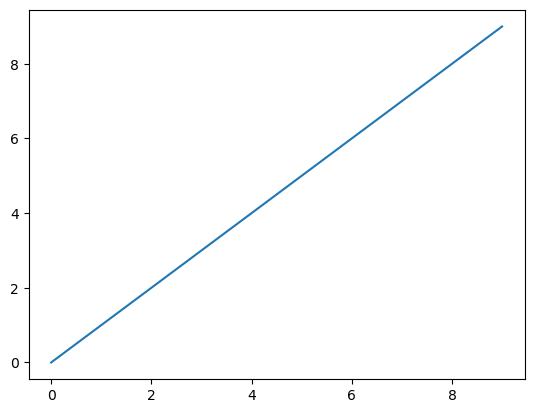

In [1]:
#| echo: false
import matplotlib.pyplot as plt
plt.plot(range(10));

### Analysis 1- Neerav
*By \<Name of person doing the analysis>*

### Analysis 2- Kaylin
*By \<Name of person doing the analysis>*

### Analysis 3- Miriam
*By \<Name of person doing the analysis>*

### Analysis 4- Jade
*By \<Joanna Chi>*

My question was, "How do testing rates and positive test rates compare across different areas of Chicago?" I wanted to solve this problem because I was interested in how different populations in Chicago may or may not have been able to test for COVID, and whether different areas had higher positivity rates. 

To solve this problem, I created two barplots. The first barplot illustrated mean testing rates across Chicago by region and year. The y-axis showed the "Test Rate - Weekly," the x-axis showed the different Chicago regions, and the years were separated by color.  The second barplot illustrated mean positive test rates across Chicago by region and year. The y-axis showed the "Percent Tested Positive - Weekly," which was calculated by dividing the number of positive tests by the total number of tests in a week. Like the first barplot, the x-axis showed the different Chicago regions, and the years were separated by color. I chose to solve the problem this way because it would allow me to visualize how much of the population of each region was getting tested along with the proportion of people getting tested in each region who were testing positive. I thought it would be successful because it would show me whether the regions with high test rates corresponded with the regions with high positivity rates. 

After looking at the graphs, I noticed that the Central/Downtown area had the highest testing rates in Chicago in 2020 and 2021, during the height of the pandemic. However, during the years where it had the highest testing rates, Central/Downtown also had the lowest positivity rates. On the other hand, the Southwest, West, Southeast, and Northwest Sides had low testing rates but very high positivity rates at the height of the pandemic. These results illustrated that the areas with the highest proportions of sick people had the lowest numbers of tests, while the areas with the lowest proportions of sick people had higher numbers of tests. Notably, Central/Downtown communities have some of the highest median household incomes in the city, while the Southwest, West, Southeast, and Northwest Sides have relatively low household incomes (https://www.chicagomag.com/Chicago-Magazine/April-2006/The-Geography-of-Money/). This could indicate an association between income and accessibility to tests, or an association between income and chances of testing positive.

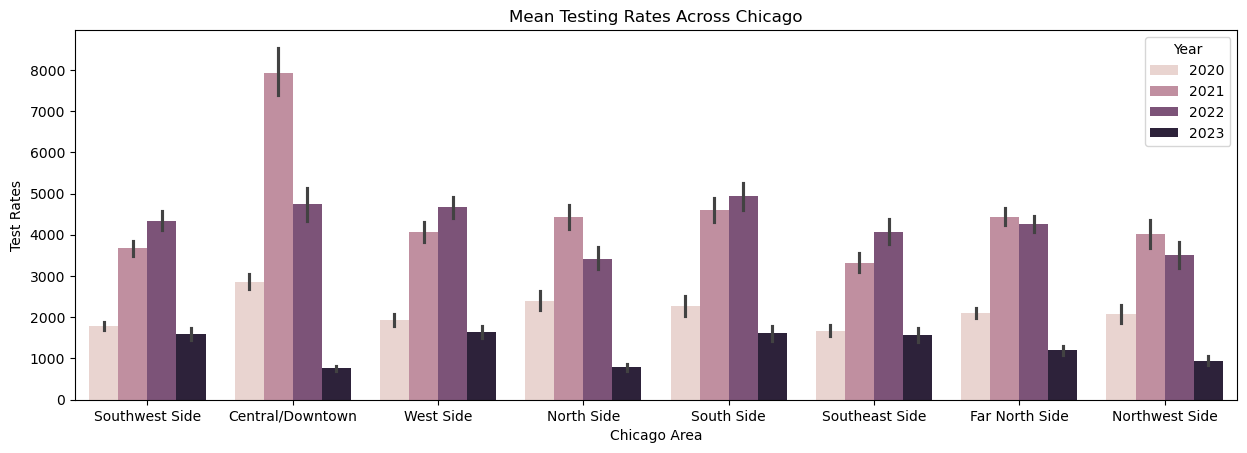

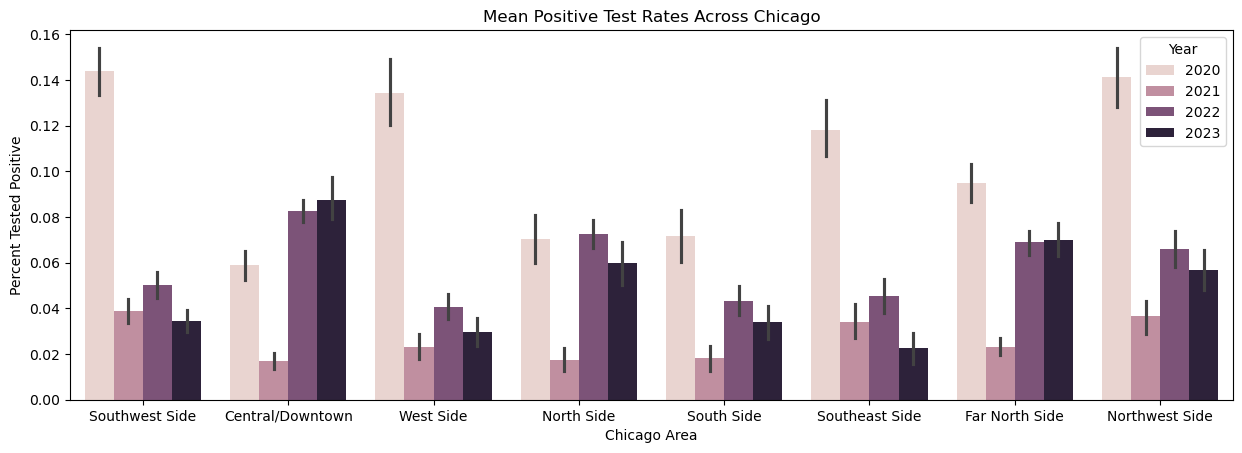

In [7]:
#| echo: false
# How do testing rates and positive test rates vary across different regions of Chicago?
a = sns.barplot(data, x='Chicago Region',y='Test Rate - Weekly',hue='Year')
a.figure.set_figwidth(15)
a.set_title('Mean Testing Rates Across Chicago')
plt.xlabel('Chicago Area')
plt.ylabel('Test Rates')
plt.show()

b = sns.barplot(data, x='Chicago Region',y='Percent Tested Positive - Weekly',hue='Year')
plt.xlabel('Chicago Area')
plt.ylabel('Percent Tested Positive')
b.figure.set_figwidth(15)
b.set_title('Mean Positive Test Rates Across Chicago')
plt.show()

One problem I encountered was the issue of figuring out which variables would be the most useful to answer my question. At first, I tried to use "Testing Rate - Cumulative" and "Percent Tested Positive - Cumulative," but both of these only increased over time due to being cumulative. Because of this, I chose to use weekly test rates and positivity rates instead. I also tried out different types of plots to see which one would be the most useful. At first, I tried using a lineplot and facetgrid to visualize how the values of each variable changed over time, colored by region. However, since the years in this dataset were categorical variables and not continuous, this visualization method was not very helpful for comparing testing and positive tests over time. Trying to color a lineplot by region also resulted in an overcrowded plot as there were 8 regions in our dataset. After this, I decided to use two barplots as they most clearly illustrated the two variables I was analyzing.

## Other sections

You are welcome to introduce additional sections or subsections, if required, to address your questions in detail. For example, you may briefly discuss potential future work that the research community could focus on to make further progress in the direction of your project's topic.

## Conclusions- Everyone

Do the individual analysis connect with each other to answer a bigger question? If yes, explain.

## Recommendations to stakeholder(s)- Neerav
What are the action items for the stakeholder(s) based on your analysis? Be as precise as possible. The stakeholder(s) are depending on you to come up with practically implementable recommendations, instead of having to think for themselves.

Do the stakeholder(s) need to be aware about some limitations of your analysis? Can your analysis be directly used by the stakeholder(s) to obtain the expected benefit / make decisions, or do they need to do some further analysis based on their own, or do they need to repeat your analysis on a more recent data for the results to be applicable? 

## References {-}

List and number all bibliographical references. When referenced in the text, enclose the citation number in square brackets, for example [1].

[1] Authors. The frobnicatable foo filter, 2014. Face and Gesture submission ID 324. Supplied as additional material
fg324.pdf. 3


## Appendix {-}

You may put additional stuff here as Appendix. You may refer to the Appendix in the main report to support your arguments. However, the appendix section is unlikely to be checked while grading, unless the grader deems it necessary.